In [1]:
import tifffile
from colicoords import Cell, Data
from colicoords.preprocess import data_to_cells
from colicoords.plot import CellPlot, CellListPlot
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
binary_stack = tifffile.imread('binary_stack_2.tif')
flu_stack = tifffile.imread('fluorescence_stack_2.tif')
brightfield_stack = tifffile.imread('brightfield_stack_2.tif')

In [3]:
data = Data()
data.add_data(binary_stack, 'binary')
data.add_data(flu_stack, 'fluorescence')
data.add_data(brightfield_stack, 'brightfield')

In [4]:
data_slice = data[5:10, 0:100, 0:100]

In [5]:
print(data.shape)
print(data_slice.shape)

(20, 512, 512)
(5, 100, 100)


In [6]:
cell_list = data_to_cells(data)
cell_list.optimize(verbose=False)

Cell 5 on image binary 1: multiple cells per selection
Image binary 7: Too many or no cells
Cell 2 on image binary 19: multiple cells per selection
Cell 3 on image binary 19: multiple cells per selection


In [7]:
clp = CellListPlot(cell_list)

<IPython.core.display.Javascript object>


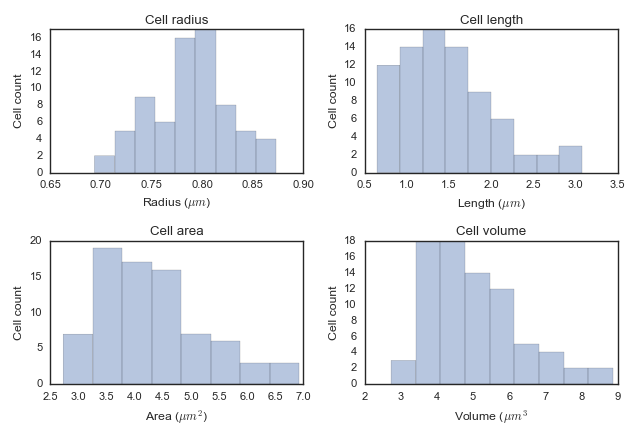

In [8]:
fig, axes = plt.subplots(2, 2)
clp.hist_property(ax=axes[0,0], tgt='radius')
clp.hist_property(ax=axes[0,1], tgt='length')
clp.hist_property(ax=axes[1,0], tgt='area')
clp.hist_property(ax=axes[1,1], tgt='volume')
axes[0,0].set_ylim(0, 17)
plt.tight_layout()
plt.autoscale()

<IPython.core.display.Javascript object>


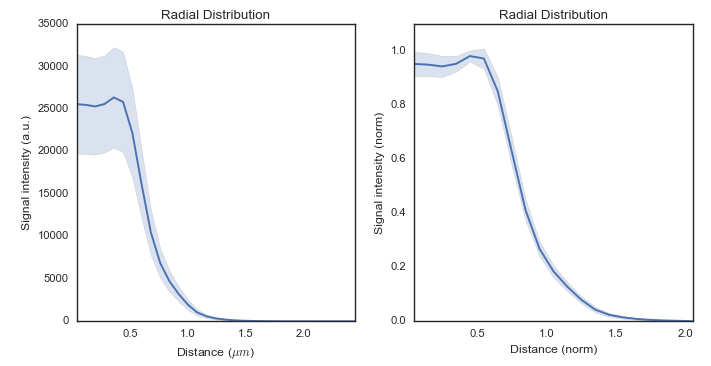

In [9]:
f, axes = plt.subplots(1, 2)
clp.plot_dist(ax=axes[0], mode='r')
axes[0].set_ylim(0, 35000)
clp.plot_dist(ax=axes[1], mode='r', norm_y=True, norm_x=True)
plt.tight_layout()